In [1]:
import os
import sys
import cv2

import matplotlib.pyplot as plt
import torch
from omegaconf import OmegaConf, DictConfig, ListConfig

sys.path.append('../../')

from torchok.constructor.config_structure import DatasetParams
from torchok.constructor.constructor import Constructor

/opt/conda/envs/torchok/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_params = {
    'data_folder': '/workdir/rbayazitov/detection/',
    'train': True,
    'download': True,
}

transform = ListConfig([
    DictConfig({
        'name': 'Resize',
        'params': {
            'width': 224,
            'height': 224
        }
    }),
    DictConfig({
        'name': 'ToTensorV2',
        'params': {
        }
    })
    
    ]
)


dataset_params = DictConfig({
    'name': 'COCODetection', 
    'params': data_params, 
    'transform' :transform})

dataset = Constructor._create_dataset(dataset_params)
dataset

100%|██████████| 19336861798/19336861798 [14:38<00:00, 22015849.77it/s]


Extracting /workdir/rbayazitov/detection/COCO/train2017.zip to /workdir/rbayazitov/detection/COCO


100%|██████████| 815585330/815585330 [00:34<00:00, 23344513.44it/s]


Extracting /workdir/rbayazitov/detection/COCO/valid2017.zip to /workdir/rbayazitov/detection/COCO


100%|██████████| 252907541/252907541 [00:11<00:00, 22899485.16it/s]


Extracting /workdir/rbayazitov/detection/COCO/annotations.zip to /workdir/rbayazitov/detection/COCO


/opt/conda/envs/torchok/lib/python3.9/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


In [3]:
dataset[0]

{'image': tensor([[[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [141., 192., 195.,  ...,  76.,  66.,  79.],
          [134., 180., 173.,  ...,  88.,  82.,  55.],
          [183., 214., 216.,  ...,  44.,  73.,  61.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [106., 178., 167.,  ...,  76.,  56.,  85.],
          [ 89., 148., 135.,  ...,  86.,  79.,  60.],
          [158., 191., 188.,  ...,  41.,  96.,  77.]],
 
         [[255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          [255., 255., 255.,  ..., 255., 255., 255.],
          ...,
          [ 83., 139., 130.,  ...,  26.,  30.,  50.],
          [ 70., 115., 105.,  ...,  50.,  39.,  25.],
          [114., 136.,

In [6]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    print(x_min, x_max, y_min, y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = str(category_id_to_name[category_id])
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

246 372 113 495
224 284 295 389
83 286 32 536
267 480 79 201


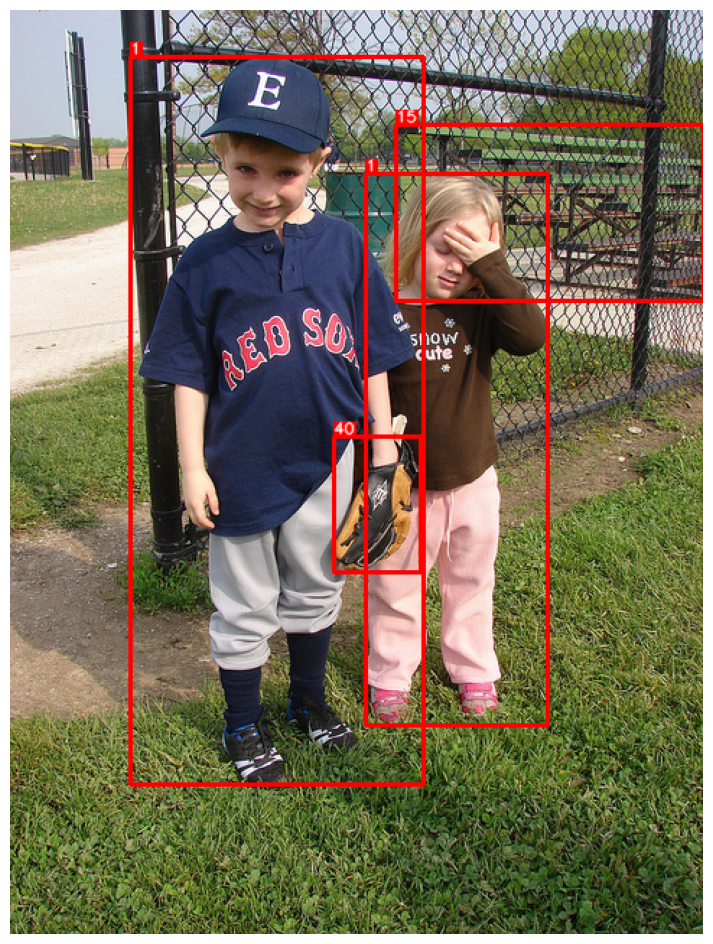

In [8]:
n = 512
sample = dataset.get_raw(n)
category_id_to_name = dict(zip(sample['label'], sample['label']))
visualize(sample['image'], sample['bboxes'], sample['label'], category_id_to_name)